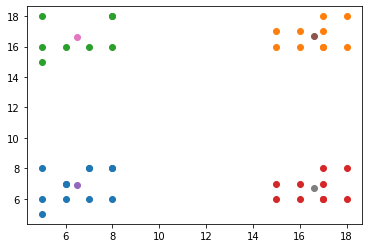

Evaluation Result : 0.9464374120400001 K value: 4


In [38]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler,StringIndexer,OneHotEncoder
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
from pyspark.ml.clustering import KMeans

spark = SparkSession.builder.getOrCreate()
pointsDF = spark.read.option('inferSchema','true').csv('datasets/points.txt')
pointsDF = pointsDF.withColumnRenamed('_c0','x')
pointsDF = pointsDF.withColumnRenamed('_c1','y')


#pointsDF.show()
vec = VectorAssembler(inputCols=['x','y'],outputCol='features')
pointsDF = vec.transform(pointsDF)
#pointsDF.show()
k = 4
km = KMeans().setK(k)
kmModel =  km.fit(pointsDF)
pointsDF = kmModel.transform(pointsDF) 
#print(kmModel.clusterCenters())
for a in range(k):  
    x = pointsDF.filter(pointsDF['prediction']==a).select('x').rdd.flatMap(lambda x : list(x)).collect()
    y = pointsDF.filter(pointsDF['prediction']==a).select('y').rdd.flatMap(lambda x : list(x)).collect()
    plt.scatter(x,y)
for center in kmModel.clusterCenters():
    x1 = center[0]
    y1 = center[1]
    plt.scatter(x1,y1)
plt.show()

#We are assigning the points to the calculated centers
eva = ClusteringEvaluator()
result = eva.evaluate(pointsDF)
print("Evaluation Result :",result, "K value:",k)